# Second version

In [68]:
import feature_selection_RL_V2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [69]:
#Data processing

datContent = [i.strip().split() for i in open("australian_data.dat").readlines()]
import csv
# write it as a new CSV file
with open("australian_data.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(datContent)

australian_data = pd.read_csv('australian_data.csv', sep=',', header=None)
australian_data.rename(columns={14: 'label'}, inplace=True)
X = australian_data.drop('label', axis=1)
y = australian_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [70]:
#Simulation
feature_number: int = 14

print('---------- AOR init ----------')
aor: list = [np.zeros(feature_number), np.zeros(feature_number)]
print(aor)

print('---------- Process init ----------')
feature_selection_process = feature_selection_RL_V2.FeatureSelectionProcessV2(feature_number, .3, .2, .99, aor, {})
print(feature_selection_process)

print('---------- The process has been successfully init ----------')

---------- AOR init ----------
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
---------- Process init ----------
FeatureSelectionProcessV2(nb_of_features=14, eps=0.3, alpha=0.2, gamma=0.99, aor=[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])], feature_structure={})
---------- The process has been successfully init ----------


In [71]:
nb_iter: int = 10
nb_explored: list = []
explored: int = 0

In [72]:
for it in range(nb_iter):

    print(f'Current state selection {it} ---------')
    current_state = feature_selection_process.start_from_empty_set()
    
    while current_state.number[0] <= 13:

        #We get the reward of the state
        if current_state.reward == 0:
            current_state.get_reward(X_train, y_train, X_test, y_test)

        #We chose the next state
        return_next_action_state = current_state.select_action(feature_selection_process.feature_structure, feature_selection_process.eps, feature_selection_process.aor)
        next_state, next_action = return_next_action_state[1], return_next_action_state[0]

        if current_state.v_value == 0:
            explored += 1
            print(explored)

        if len(next_action.state_next.description) >= 14:
            break

        #We update the v_value of the state
        current_state.update_v_value(feature_selection_process.alpha, feature_selection_process.gamma, next_state.v_value)

        #We update the aor table
        feature_selection_process.aor = next_action.get_aorf(feature_selection_process.aor)

        #Add the state to the research tree
        feature_selection_process.add_to_historic(current_state)

        current_state = next_state
        
    nb_explored.append(explored)

results = feature_selection_process.get_final_aor_sorted()

Current state selection 0 ---------
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Current state selection 1 ---------
15
16
17
18
19
20
21
22
23
24
25
26
27
Current state selection 2 ---------
28
29
30
31
32
33
34
35
36
37
38
39
40
Current state selection 3 ---------
41
42
43
44
45
46
47
48
49
50
51
52
53
Current state selection 4 ---------
54
55
56
57
58
59
60
61
62
63
64
65
66
Current state selection 5 ---------
67
68
69
70
71
72
73
74
75
76
77
78
79
Current state selection 6 ---------
80
81
82
83
84
85
86
87
88
89
90
91
92
Current state selection 7 ---------
93
94
95
96
97
98
99
100
101
102
103
104
Current state selection 8 ---------
105
106
107
108
109
110
111
112
113
114
115
116
Current state selection 9 ---------
117
118
119
120
121
122
123
124
125
126
127
128


In [73]:
feature_selection_process.get_optimal_state_value()

State(number=[2, 2], description=[6, 12], v_value=0.42164912280701755, reward=0.8640350877192983, nb_visited=3)

In [74]:
feature_selection_process.aor

[array([ 9., 10.,  9.,  8., 10., 10., 10.,  9.,  9., 10.,  8., 10.,  9.,
         9.]),
 array([0.09019815, 0.08605263, 0.08680556, 0.08576128, 0.16019864,
        0.08596491, 0.09431509, 0.08506335, 0.08594055, 0.08619883,
        0.08641917, 0.08563353, 0.31949991, 0.08601365])]

In [75]:
results

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13),
 array([ 9., 10.,  9.,  8., 10., 10., 10.,  9.,  9., 10.,  8., 10.,  9.,
         9.]),
 (0.09019814814814814,
  0.08605263157894737,
  0.08680555555555555,
  0.08576127819548872,
  0.1601986432748538,
  0.08596491228070174,
  0.09431509161793372,
  0.08506335282651073,
  0.08594054580896686,
  0.08619883040935673,
  0.08641917293233083,
  0.0856335282651072,
  0.31949991450448345,
  0.08601364522417153),
 array([ 7, 11,  3,  8,  5, 13,  1,  9, 10,  2,  0,  6,  4, 12])]

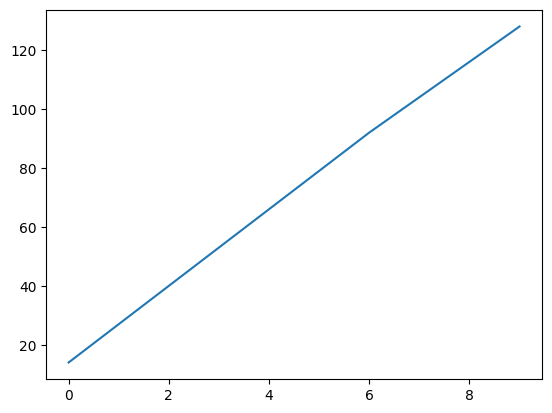

In [76]:
plt.plot([i for i in range(len(nb_explored))], nb_explored)

In [60]:
#Five first  [ 0,  5,  1, 13,  9, 12,  7,  6,  8,  3,  2, 10,  4, 11] --> 0.828

#Four randomly picked first  [13, 11,  0,  3, 10,  7,  2,  6,  8,  9,  4, 12,  5,  1] --> 0.671
#Four initial state picked first [ 3, 11,  5, 13,  6,  8,  0,  4,  9,  2, 10, 12,  1,  7] --> 0.846
#Four initial state picked first [ 1,  9,  2,  8,  4,  3, 10,  5, 11,  7, 13,  0, 12,  6] --> 0.776
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4)
clf.fit(X_train[[5,  1,  7,  4,  0,  6,  9, 10, 12, 11,  3]], y_train)
accuracy: float = clf.score(X_test[[5,  1,  7,  4,  0,  6,  9, 10, 12, 11,  3]], y_test)

In [61]:
accuracy

0.8596491228070176

In [58]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = RandomForestClassifier(max_depth=2)
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)

In [59]:
selector.score(X_test, y_test)

0.868421052631579